In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

pd.options.display.max_columns = 100

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.0
pandas version :  2.2.2
seaborn version :  0.13.2


## Load Dataset

In [2]:
# Load dataset in Google Colab
data_path = 'superstore_dataset.csv (1)\superstore_dataset.csv'
data = pd.read_csv(data_path)
data.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 19 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 9988 baris.

# Data Cleaning and Preparation

In [4]:
#change format 'sales', profit, to float
#data['sales'] = data['sales'].str.replace(',', '.').astype(float)
#data['profit'] = data['profit'].str.replace(',', '.').astype(float)
#data['discount'] = data['discount'].str.replace('%', '').astype(float) / 100

---
Time Series

---




In [5]:
data['order_date'] = pd.to_datetime(data['order_date'])
data['ship_date'] = pd.to_datetime(data['ship_date'])

#extract year and month from order_date
data['order_year'] = data['order_date'].dt.year
data['order_month'] = data['order_date'].dt.month

#extract year and month from ship_date
data['ship_year']=data['ship_date'].dt.year
data['ship_month']=data['ship_date'].dt.month

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   customer       9994 non-null   object        
 4   manufactory    9994 non-null   object        
 5   product_name   9994 non-null   object        
 6   segment        9994 non-null   object        
 7   category       9994 non-null   object        
 8   subcategory    9994 non-null   object        
 9   region         9994 non-null   object        
 10  zip            9994 non-null   int64         
 11  city           9994 non-null   object        
 12  state          9994 non-null   object        
 13  country        9994 non-null   object        
 14  discount       9994 non-null   float64       
 15  profit         9994 n

---
**Missing Value**

---



In [6]:
data.isnull().any()

order_id         False
order_date       False
ship_date        False
customer         False
manufactory      False
product_name     False
segment          False
category         False
subcategory      False
region           False
zip              False
city             False
state            False
country          False
discount         False
profit           False
quantity         False
sales            False
profit_margin    False
order_year       False
order_month      False
ship_year        False
ship_month       False
dtype: bool

Berdasarkan output diatas, jika hasil output tertulis False, artinya kolom tersebut tidak mengandung Missing Values.
Untuk mengetahui jumlah missing value tiap kolom, dapat digunakan sum()

In [7]:
data.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
order_year       0
order_month      0
ship_year        0
ship_month       0
dtype: int64

Based on the summarized output, there are no columns containing Missing Values (blanks/N/A (Python: nan or NaN)).

In [8]:
#Total Number of Missing NA
data.isnull().sum().sum()

np.int64(0)

# Data Understanding

In [9]:
data.describe(exclude=['int64', 'float64', 'datetime64[ns]', 'int32']).transpose()

,count,unique,top,freq
order_id,9994,5009,US-2023-100111,14
customer,9994,793,William Brown,37
manufactory,9994,182,Other,1893
product_name,9994,1849,Staple envelope,48
segment,9994,3,Consumer,5191
category,9994,3,Office Supplies,6026
subcategory,9994,17,Binders,1523
region,9994,4,West,3203
city,9994,531,New York City,915
state,9994,49,California,2001


From the output above, we obtained several pieces of information, including:
1.  'order_id' is a unique identifier that will be used to count rows in Tableau and serve as the primary key in SQL table creation.
2. There are 793 unique customers, which may be due to orders on the same day but with different items. The customer who made the most transactions is William Brown, with a total of 37 transactions.
3. There are 1,849 different products in this store. The most purchased product is the Staple envelope.
4. New York City is the top city among all 531 cities in the United States.

In [10]:
data[data['order_id']=='US-2023-100111']

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin,order_year,order_month,ship_year,ship_month
8628,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Global,Global Troy Executive Leather Low-Back Tilter,Consumer,Furniture,Chairs,East,10035,New York City,New York,United States,0.1,375.7350,5,2254.410,0.166667,2022,9,2022,9
8629,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Global,"Global Leather Task Chair, Black",Consumer,Furniture,Chairs,East,10035,New York City,New York,United States,0.1,8.0991,1,80.991,0.100000,2022,9,2022,9
8630,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Hon,Hon Valutask Swivel Chairs,Consumer,Furniture,Chairs,East,10035,New York City,New York,United States,0.1,18.1764,3,272.646,0.066667,2022,9,2022,9
8631,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Hon,Hon 4070 Series Pagoda Armless Upholstered Sta...,Consumer,Furniture,Chairs,East,10035,New York City,New York,United States,0.1,609.7157,11,2888.127,0.211111,2022,9,2022,9
8632,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Pressboard,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",Consumer,Office Supplies,Binders,East,10035,New York City,New York,United States,0.2,3.9771,3,11.784,0.337500,2022,9,2022,9
8633,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Advantus,Advantus Push Pins,Consumer,Office Supplies,Fasteners,East,10035,New York City,New York,United States,0.0,1.7876,2,4.360,0.410000,2022,9,2022,9
8634,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,TOPS,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",Consumer,Office Supplies,Paper,East,10035,New York City,New York,United States,0.0,18.1044,9,38.520,0.470000,2022,9,2022,9
8635,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Adams,"Adams Phone Message Book, 200 Message Capacity...",Consumer,Office Supplies,Paper,East,10035,New York City,New York,United States,0.0,6.3296,2,13.760,0.460000,2022,9,2022,9
8636,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,Other,"SimpliFile Personal File, Black Granite, 15w x...",Consumer,Office Supplies,Storage,East,10035,New York City,New York,United States,0.0,12.7120,4,45.400,0.280000,2022,9,2022,9
8637,US-2023-100111,2022-09-20,2022-09-26,Seth Vernon,SanDisk,SanDisk Cruzer 64 GB USB Flash Drive,Consumer,Technology,Accessories,East,10035,New York City,New York,United States,0.0,21.7920,2,72.640,0.300000,2022,9,2022,9


In [11]:
cats_to_visualize=['product_name', 'category', 'subcategory', 'city', 'state']

In [12]:
#Categorical Counts
for col in cats_to_visualize :
  print(f'Value counts untuk {col} :')
  print(data[col].value_counts(), '\n')

Value counts untuk product_name :
product_name
Staple envelope                                                              48
Easy-staple paper                                                            46
Staples                                                                      46
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      19
                                                                             ..
Xerox 1938                                                                    1
Xerox 1901                                                                    1
Panasonic Business Telephones KX-T7736                                        1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Acco Glide Clips                                                              1
Name: count, Length: 1849, dtype: int64 

Value counts untuk category :
c

# Product Analysis

<Axes: ylabel='count'>

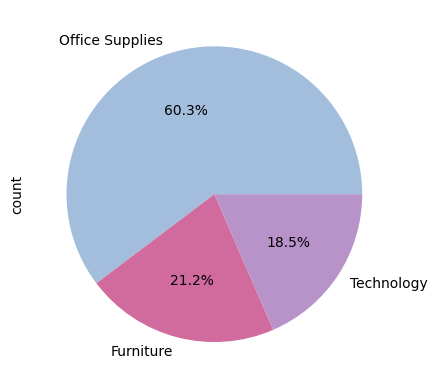

In [29]:
##number of products in each category
data['category'].value_counts().plot.pie(autopct="%1.1f%%", colors=['#A2BEDC', '#D26B9D', '#B793C9'])

In [14]:
##number of products in each sub-category
data['subcategory'].value_counts()

subcategory
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

The store has wide variety of Office Supplies especially in Binders and Paper department.

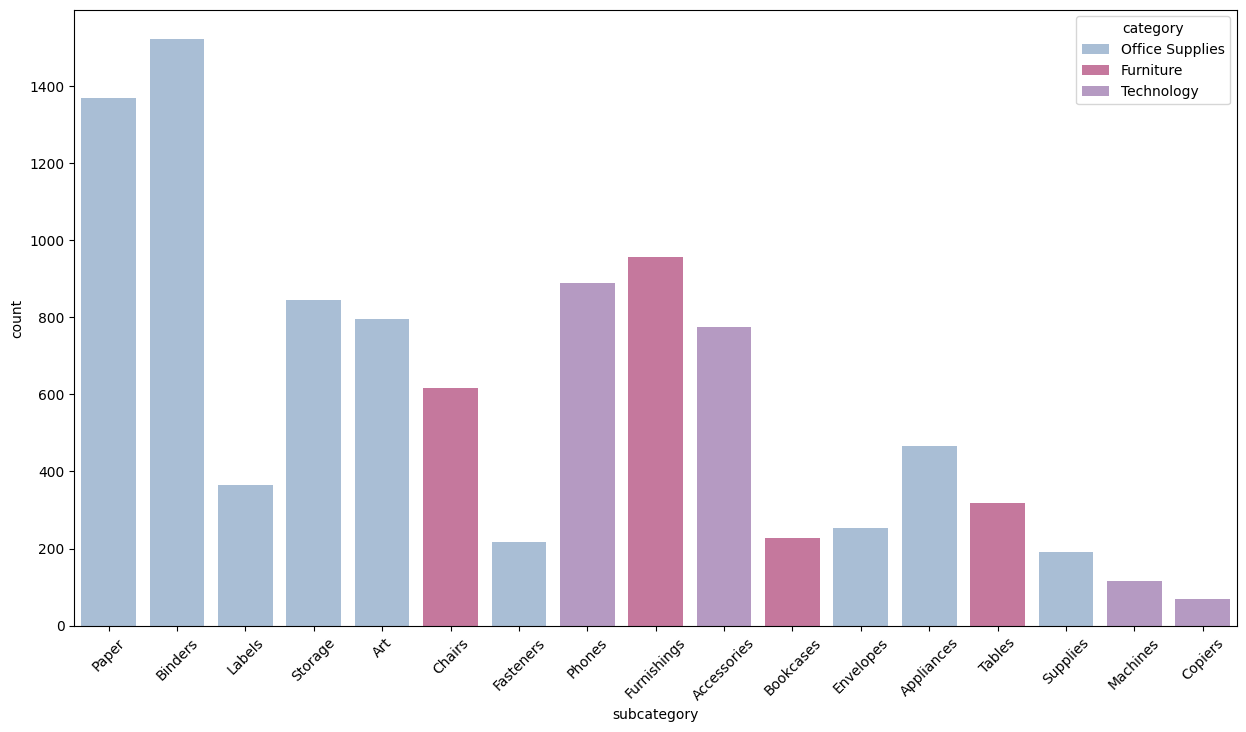

In [41]:
colors =['#A2BEDC', '#D26B9D', '#B793C9']
plt.figure(figsize=(15,8))
sns.countplot(x="subcategory", hue="category", data=data, palette=colors)
plt.xticks(rotation=45)
plt.show()

In [53]:
#Filter for Subcategory Office Supply
Office_Supplies = data[data['category']=='Office Supplies']
sorted_office_supplies = Office_Supplies['subcategory'].value_counts()

print(sorted_office_supplies)

subcategory
Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: count, dtype: int64


In [54]:
#Filter for Subcategory Office Supply
Office_Supplies = data[data['category']=='Technology']
sorted_office_supplies = Office_Supplies['subcategory'].value_counts()

print(sorted_office_supplies)

subcategory
Phones         889
Accessories    775
Machines       115
Copiers         68
Name: count, dtype: int64


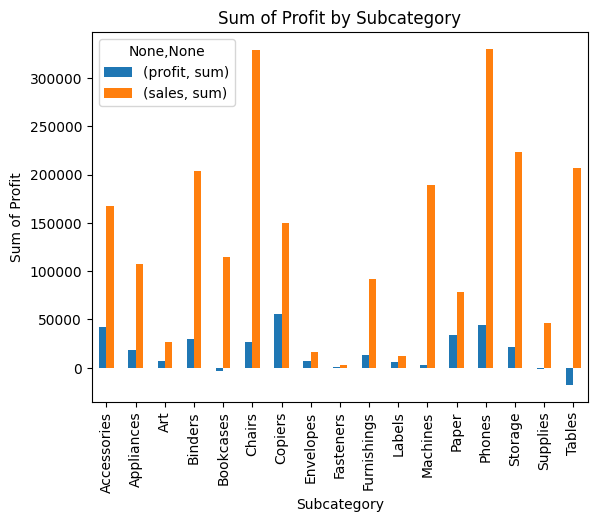

In [102]:
#Plot Sales and Profit in each Sub-category
data.groupby('subcategory')[['profit','sales']].agg(['sum']).plot.bar()
plt.title('Sum of Profit by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Sum of Profit')
plt.show()

Highest profit is earned in **Copiers** while Selling price for **Chairs** and **Phones** is extremely high compared to other products.


People dont prefer to buy **Tables** and **Bookcases** from Superstore. Hence these departments are in loss.

In [18]:
#create some new columns: Cost
data['cost'] = (data['sales']-data['profit'])/data['quantity']
data['cost'].head()

0      5.4484
1      4.5135
2      2.5041
3    112.5036
4      4.8840
Name: cost, dtype: float64

Top Product Analysis:

In [213]:
#Distribution of Top 10 Products
product_value_count = data['product_name'].value_counts()
top_product_visualize = product_value_count.head(10)
top_product_visualize

product_name
Staple envelope                                              48
Easy-staple paper                                            46
Staples                                                      46
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      19
Staple remover                                               18
KI Adjustable-Height Table                                   18
Storex Dura Pro Binders                                      17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: count, dtype: int64

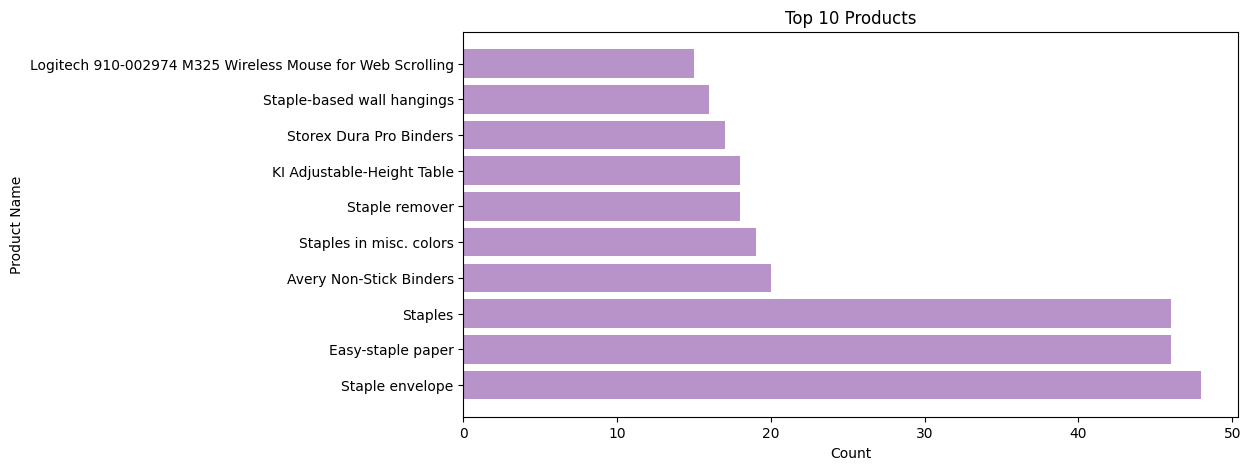

In [229]:
plt.figure(figsize=(10,5))
plt.barh(top_product_visualize.index, top_product_visualize.values, color='#B793C9')
plt.title('Top 10 Products')
plt.ylabel('Product Name')
plt.xlabel('Count')
plt.show()

In [120]:
#10 Products with high Profit
data['profit_per_product'] = data['profit']/data['quantity']
top_products_profit = data.sort_values(by='profit_per_product', ascending=False).head(10)

print(top_products_profit[['product_name','category', 'profit_per_product']])

                                           product_name         category  \
7108              Canon imageCLASS 2200 Advanced Copier       Technology   
5776              Canon imageCLASS 2200 Advanced Copier       Technology   
9338              Canon imageCLASS 2200 Advanced Copier       Technology   
1455  Canon imageCLASS MF7460 Monochrome Digital Las...       Technology   
8987              Canon imageCLASS 2200 Advanced Copier       Technology   
1177               Ibico EPK-21 Electric Binding System  Office Supplies   
2177  Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
2102  Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
2399  Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   
4182  Fellowes PB500 Electric Punch Plastic Comb Bin...  Office Supplies   

      profit_per_product  
7108           1679.9952  
5776           1679.9952  
9338           1679.9952  
1455            997.9950  
8987            979.9972  
1

**Products with High Sales & Profits**

In [433]:
# Memfilter 20 produk yang memiliki sales tinggi dan profit tinggi
top_product_threshold = product_value_count.quantile(0.75)
top_profit_threshold = data['profit'].quantile(0.75)

top_sales_profit = data[(data['product_name'].isin(product_value_count.index[product_value_count >= top_product_threshold])) &
                          (data['profit'] >= top_profit_threshold)]

visualize_stars_product = top_sales_profit.sort_values(by='profit', ascending=False)[['product_name','profit']].head(15)
visualize_stars_product


,product_name,profit
6541,GBC Ibimaster 500 Manual ProClick Binding System,4946.3700
2177,Fellowes PB500 Electric Punch Plastic Comb Bin...,3177.4750
5790,Hewlett Packard LaserJet 3310 Copier,2591.9568
2399,Fellowes PB500 Electric Punch Plastic Comb Bin...,1906.4850
8905,Fellowes PB500 Electric Punch Plastic Comb Bin...,1906.4850
8231,GBC DocuBind TL300 Electric Binding System,1453.1238
7176,Hewlett Packard LaserJet 3310 Copier,1439.9760
2102,Fellowes PB500 Electric Punch Plastic Comb Bin...,1270.9900
7223,GBC DocuBind TL300 Electric Binding System,1264.7559
2632,Fellowes PB500 Electric Punch Plastic Comb Bin...,1143.8910


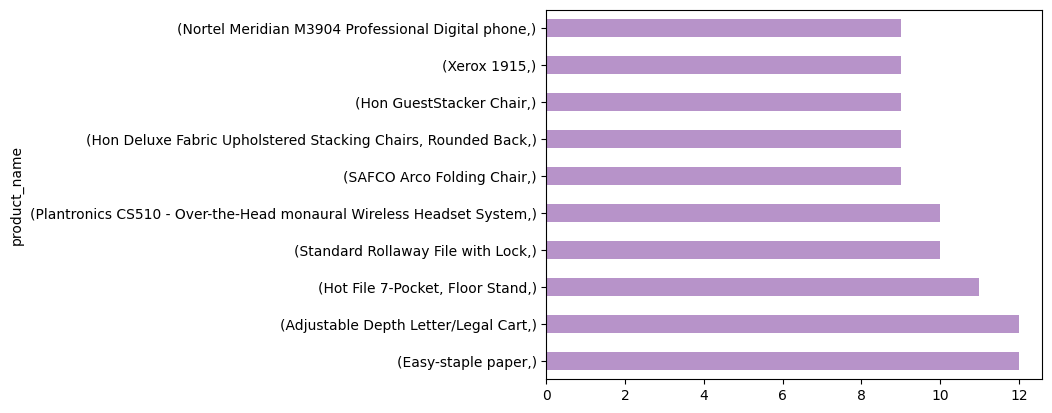

In [274]:
visualize_stars_product.plot.barh(color='#B793C9')
plt.show()

<Axes: ylabel='count'>

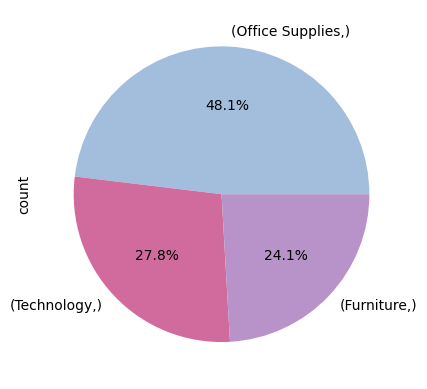

In [277]:
#Category with high sales and profit
top_sales_profit[['category']].value_counts().plot.pie(autopct="%1.1f%%", colors=['#A2BEDC', '#D26B9D', '#B793C9'])

In [439]:
pivot_table = top_sales_profit.groupby('category')[['subcategory','profit']].head()
pivot_table

,subcategory,profit
7,Chairs,746.4078
9,Binders,274.4910
12,Phones,204.1092
13,Phones,113.6742
21,Chairs,87.3504
26,Storage,238.6530
30,Storage,34.3548
33,Accessories,65.9780
41,Envelopes,36.6930
54,Appliances,93.5816


The data of products with highest sales and profits as shown above can be used in sales strategies and can enhance profitability

---

**Underperforming Product Analysis**

In [305]:
low_products = data.sort_values(by='profit_per_product', ascending=True).head(10)

print(low_products[['product_name', 'profit_per_product']])

                                           product_name  profit_per_product
6272          Cubify CubeX 3D Printer Double Head Print          -1319.9956
3952          Cubify CubeX 3D Printer Double Head Print          -1319.9956
9141          Cubify CubeX 3D Printer Triple Head Print           -959.9976
7295          Lexmark MX611dhe Monochrome Laser Printer           -679.9960
9658               Ibico EPK-21 Electric Binding System           -585.8969
4476          GBC DocuBind P400 Electric Binding System           -462.7366
808           GBC DocuBind P400 Electric Binding System           -462.7366
8487  Fellowes PB500 Electric Punch Plastic Comb Bin...           -381.2970
9371  Fellowes PB500 Electric Punch Plastic Comb Bin...           -381.2970
8939          GBC DocuBind P400 Electric Binding System           -326.6376


In [399]:
#Filter products based on low sales and low profits
product_count = data['product_name'].value_counts()

product_threshold = product_count.quantile(0.25)
profit_threshold = data['profit'].quantile(0.25)

low_sales_low_profit = data[(data['product_name'].isin(product_count.index[product_count <= product_threshold])) &
                          (data['profit'] <= profit_threshold)]
low_sales_low_profit.sort_values(by='profit', ascending=True)[['product_name','profit']].head(20)

,product_name,profit
6272,Cubify CubeX 3D Printer Double Head Print,-6599.9780
9141,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
9658,Ibico EPK-21 Electric Binding System,-2929.4845
3952,Cubify CubeX 3D Printer Double Head Print,-2639.9912
219,Cisco TelePresence System EX90 Videoconferenci...,-1811.0784
1999,Cisco 9971 IP Video Phone Charcoal,-950.4000
1127,HP Designjet T520 Inkjet Large Format Printer ...,-944.9946
5797,Zebra GK420t Direct Thermal/Thermal Transfer P...,-938.2800
9292,Epson TM-T88V Direct Thermal Printer - Monochr...,-935.9595
4273,High Speed Automatic Electric Letter Opener,-786.0144


In [406]:
#Filter category based on low sales and low profits
low_sales_low_profit.sort_values(by='profit')[['category','subcategory','profit']].groupby('category').head()

,category,subcategory,profit
6272,Technology,Machines,-6599.9780
9141,Technology,Machines,-3839.9904
9658,Office Supplies,Binders,-2929.4845
3952,Technology,Machines,-2639.9912
219,Technology,Machines,-1811.0784
1999,Technology,Machines,-950.4000
4273,Office Supplies,Supplies,-786.0144
8434,Furniture,Tables,-566.5625
9770,Furniture,Tables,-420.0000
2691,Furniture,Bookcases,-376.6932


## Customer Analysis

In [21]:
data['customer'].nunique()

793

In [22]:
#Top 10 customers who order frequently
top10_customer = data['customer'].value_counts().head(10)
top10_customer

customer
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Jonathan Doherty       32
Seth Vernon            32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: count, dtype: int64

In [23]:
segment_value=data['segment'].value_counts()

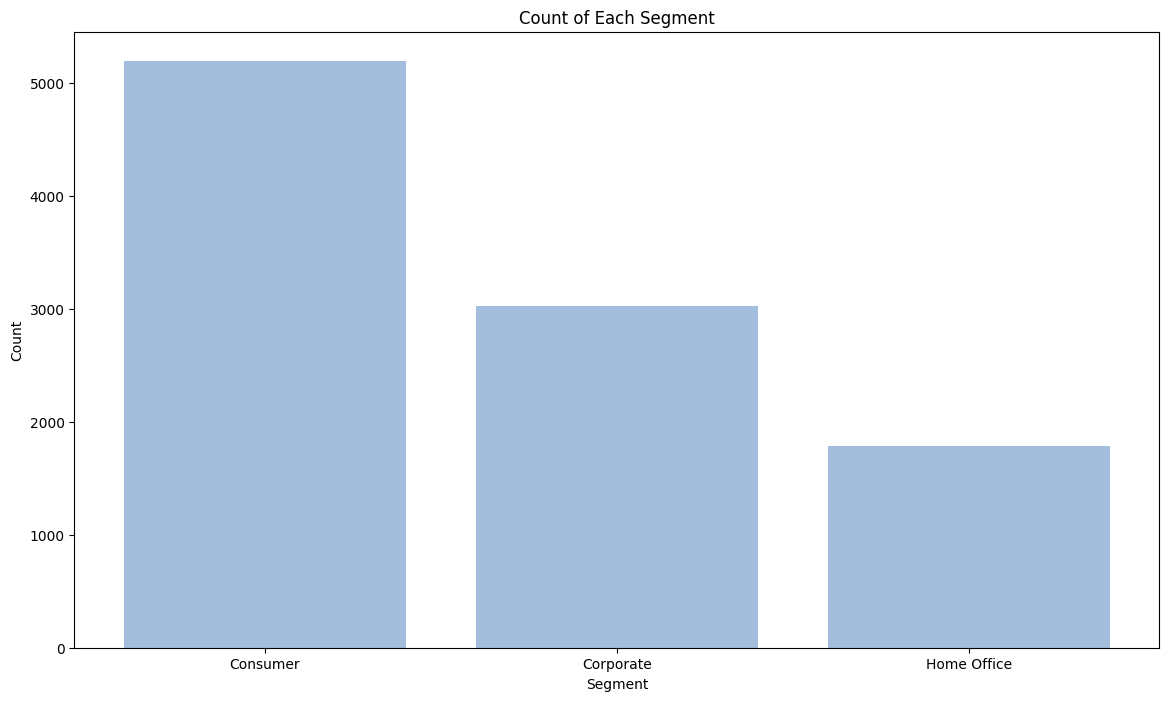

In [32]:
plt.figure(figsize=(14, 8))
plt.bar(segment_value.index, segment_value.values, color='#A2BEDC')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Count of Each Segment')
plt.show()

Consumer is the highest segment

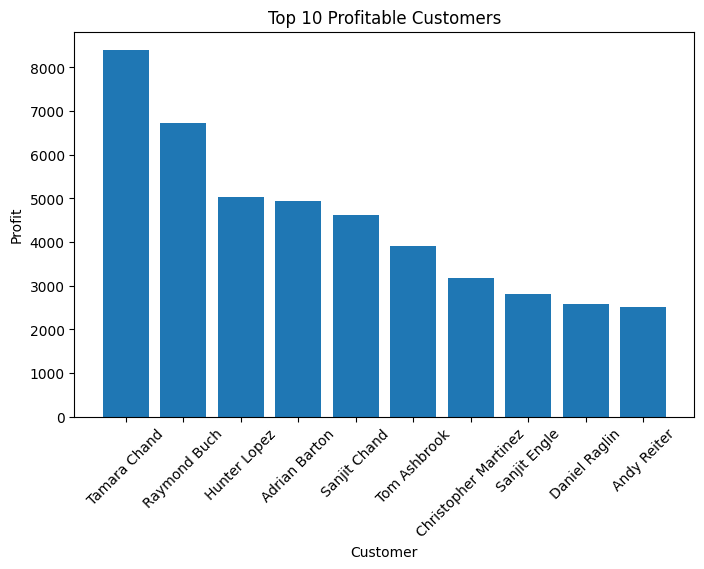

In [25]:
#Top 10 Customers who benefitted the store
sorted_profit = data.sort_values(by='profit', ascending=False).head(10)
plt.figure(figsize=(8, 5))
plt.bar("customer", "profit", data=sorted_profit)
plt.xlabel('Customer')
plt.ylabel('Profit')
plt.title('Top 10 Profitable Customers')
plt.xticks(rotation=45)
plt.show()

Export Final Data

In [26]:
#Export the final dataframe
#data.to_csv('superstore_dataset_final.csv', index=False)